# Tarea 1. Modelo de Negocios

## Caso de Negocio en power BI.

Una empresa de servicios financieros “X” sospecha de posible fraude entre sus agentes de ventas. Los clientes se mueven hacia la competencia y regresan a la empresa “X” cuantas veces lo deseen. Estos movimientos son influenciados completamente por los agentes de ventas. Cada vez que un cliente nuevo ingresa a la compañía “X” el agente de venta relacionado recibe una comisión. Del mismo modo ocurre cuando el cliente entra por segunda, tercera o n vez a la compañía “X”. La hipótesis de la empresa “X” es que los agentes están moviendo a los clientes con el único objetivo de ganar comisión en ciclos de entradas y salidas. El negocio quiere identificar los agentes que están cometiendo malas prácticas en función de ciertos criterios.  

Con código python realizar el análisis para: Identificar los agentes que estan moviendo cliente de forma atípica (agentes que estan cometiendo fraude de movimiento de clientes entre otros competidores).  

Considerar 3 movimientos para que sea anormal: in-out-in | out-in-out  

Suponer que somos el competidor 10.  

Definir tabla de pares únicos de agentes: Agente_1 | Agente_2 | Clientes_en_común  
  

**Descripción de los datos:**
- DATE: Fecha
- ClientID: cliente
- MOVEMENT: movimiento entrada o salida
- BALANCE_IN: monto invertido del cliente con el que llegó
- TRANSFEROR: competidor donde se cambia el cliente
- BALANCE_OUT: monto invertido del cliente con el que salió
- RECEPIENT: competidor que recibe al cliente
- AGENT_ID: identificador del agente
- STATUS: si está activo
- CHANNEL: medio por el cual se hace la comunicación del cambio SMS, Whatsapp, correo, llamada telefónica, correo
- IN: entrada
- OUT: salida

In [1]:
# Librerías

import pandas as pd
import numpy as np
import networkx as nx


In [2]:
# Cargar archivo

file_path = 'ClientMovementsSN.csv'  

df = pd.read_csv(file_path, sep = ";", encoding = 'latin1')  


In [3]:
df.shape

(749202, 13)

In [4]:
df.head()

,DATE,ClientID,MOVEMENT,BALANCE_IN,TRANSFEROR,BALANCE_OUT,RECEPIENT,AGENT.ID,STATUS,CHANNEL,aux,IN,OUT
0,31/12/2018,1,in,25777382,Competitor 14,0,Competitor 9,24597,Active,CHANNEL 4,1,1,0
1,28/02/2018,2,out,0,Competitor 9,0,Competitor 10,13087,Active,CHANNEL 5,1,0,1
2,31/01/2017,3,out,0,Competitor 9,17552962,Competitor 10,18024,Active,CHANNEL 5,1,0,1
3,31/08/2019,4,in,1965188,Competitor 2,0,Competitor 9,14667,Active,CHANNEL 1,1,1,0
4,31/03/2017,5,out,0,Competitor 9,29433839,Competitor 10,30677,Active,CHANNEL 5,1,0,1


In [5]:
# Definir los mapeos para los canales y los agentes

channel_mapping = {
    'CHANNEL 1': 'Facebook',
    'CHANNEL 2': 'X',
    'CHANNEL 3': 'Instagram',
    'CHANNEL 4': 'LinkedIn',
    'CHANNEL 5': 'WhatsApp',
    'CHANNEL 6': 'TikTok',
    'CHANNEL 7': 'Televisión',
    'CHANNEL 8': 'Radio'
}

agent_mapping = {
    'Competitor 2': 'Afore Azteca',
    'Competitor 3': 'Afore Citibanamex',
    'Competitor 4': 'Afore Coppel',
    'Competitor 5': 'Afore Inbursa',
    'Competitor 6': 'Afore Invercap',
    'Competitor 7': 'Afore PensionISSSTE',
    'Competitor 8': 'Afore SURA',
    'Competitor 9': 'Afore XXI Banorte',
    'Competitor 10': 'Afore Profuturo',
    'Competitor 12': 'Afore Principal',
    'Competitor 13': 'Afore X',
    'Competitor 14': 'Afore Y'
}


In [6]:

# Sustituir los nombres en el DataFrame original

df['CHANNEL'] = df['CHANNEL'].replace(channel_mapping)
df['TRANSFEROR'] = df['TRANSFEROR'].replace(agent_mapping)
df['RECEPIENT'] = df['RECEPIENT'].replace(agent_mapping)


In [7]:
# Verificar los resultados de las sustituciones

df.head()


,DATE,ClientID,MOVEMENT,BALANCE_IN,TRANSFEROR,BALANCE_OUT,RECEPIENT,AGENT.ID,STATUS,CHANNEL,aux,IN,OUT
0,31/12/2018,1,in,25777382,Afore Y,0,Afore XXI Banorte,24597,Active,LinkedIn,1,1,0
1,28/02/2018,2,out,0,Afore XXI Banorte,0,Afore Profuturo,13087,Active,WhatsApp,1,0,1
2,31/01/2017,3,out,0,Afore XXI Banorte,17552962,Afore Profuturo,18024,Active,WhatsApp,1,0,1
3,31/08/2019,4,in,1965188,Afore Azteca,0,Afore XXI Banorte,14667,Active,Facebook,1,1,0
4,31/03/2017,5,out,0,Afore XXI Banorte,29433839,Afore Profuturo,30677,Active,WhatsApp,1,0,1


In [8]:
df.dtypes

DATE           object
ClientID        int64
MOVEMENT       object
BALANCE_IN      int64
TRANSFEROR     object
BALANCE_OUT     int64
RECEPIENT      object
AGENT.ID        int64
STATUS         object
CHANNEL        object
aux             int64
IN              int64
OUT             int64
dtype: object

In [9]:
df = df.rename(columns={'AGENT.ID': 'AGENT_ID'})   # renombrar columna

In [10]:
df = df.drop ('aux', axis = 1)     # eliminar columna

In [11]:
df.head()

,DATE,ClientID,MOVEMENT,BALANCE_IN,TRANSFEROR,BALANCE_OUT,RECEPIENT,AGENT_ID,STATUS,CHANNEL,IN,OUT
0,31/12/2018,1,in,25777382,Afore Y,0,Afore XXI Banorte,24597,Active,LinkedIn,1,0
1,28/02/2018,2,out,0,Afore XXI Banorte,0,Afore Profuturo,13087,Active,WhatsApp,0,1
2,31/01/2017,3,out,0,Afore XXI Banorte,17552962,Afore Profuturo,18024,Active,WhatsApp,0,1
3,31/08/2019,4,in,1965188,Afore Azteca,0,Afore XXI Banorte,14667,Active,Facebook,1,0
4,31/03/2017,5,out,0,Afore XXI Banorte,29433839,Afore Profuturo,30677,Active,WhatsApp,0,1


In [12]:
df.dtypes

DATE           object
ClientID        int64
MOVEMENT       object
BALANCE_IN      int64
TRANSFEROR     object
BALANCE_OUT     int64
RECEPIENT      object
AGENT_ID        int64
STATUS         object
CHANNEL        object
IN              int64
OUT             int64
dtype: object

In [13]:
# Guardar el DataFrame actualizado si es necesario

df.to_csv('ClientMovementsSN_updated.csv', index = False)


## Base actualizada

In [14]:
# Cargar archivo nuevo

file_path_new = 'ClientMovementsSN_updated.csv'  

data = pd.read_csv(file_path_new, sep = ",")  

In [15]:
# Valores nulos

data.isna().sum()

DATE           0
ClientID       0
MOVEMENT       0
BALANCE_IN     0
TRANSFEROR     0
BALANCE_OUT    0
RECEPIENT      0
AGENT_ID       0
STATUS         0
CHANNEL        0
IN             0
OUT            0
dtype: int64

In [16]:
data['AGENT_ID'] = data['AGENT_ID'].astype('object')     # cambiar tipo de dato
data['ClientID'] = data['ClientID'].astype('object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749202 entries, 0 to 749201
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   DATE         749202 non-null  object
 1   ClientID     749202 non-null  object
 2   MOVEMENT     749202 non-null  object
 3   BALANCE_IN   749202 non-null  int64 
 4   TRANSFEROR   749202 non-null  object
 5   BALANCE_OUT  749202 non-null  int64 
 6   RECEPIENT    749202 non-null  object
 7   AGENT_ID     749202 non-null  object
 8   STATUS       749202 non-null  object
 9   CHANNEL      749202 non-null  object
 10  IN           749202 non-null  int64 
 11  OUT          749202 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 68.6+ MB


In [18]:
data.describe()

,BALANCE_IN,BALANCE_OUT,IN,OUT
count,7.492020e+05,7.492020e+05,749202.000000,749202.000000
mean,8.075061e+06,2.455343e+07,0.521000,0.479000
std,1.931037e+07,3.010547e+08,0.499559,0.499559
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.295560e+05,0.000000e+00,1.000000,0.000000
75%,8.810818e+06,7.747397e+06,1.000000,1.000000
max,9.668461e+08,9.997775e+09,1.000000,1.000000


In [19]:
# Identificar agentes

print("Valores únicos: \n ", data['AGENT_ID'].unique())

print("\n Cantidad de valores únicos: \n ", len(data['AGENT_ID'].unique()))

Valores únicos: 
  [24597 13087 18024 ... 16605 12946 7845]

 Cantidad de valores únicos: 
  31291


In [20]:
# Identificar CHANNEL

print("Valores únicos: \n ", data['CHANNEL'].unique())

print("\n Cantidad de valores únicos: \n ", len(data['CHANNEL'].unique()))


Valores únicos: 
  ['LinkedIn' 'WhatsApp' 'Facebook' 'Radio' 'Televisión' 'Instagram'
 'TikTok' 'X']

 Cantidad de valores únicos: 
  8


In [21]:
# Identificar STATUS

print("Valores únicos: \n ", data['STATUS'].unique())

print("\n Cantidad de valores únicos: \n ", len(data['STATUS'].unique()))


Valores únicos: 
  ['Active']

 Cantidad de valores únicos: 
  1


In [22]:
# Identificar TRANSFEROR

print("Valores únicos: \n ", data['TRANSFEROR'].unique())

print("\n Cantidad de valores únicos: \n ", len(data['TRANSFEROR'].unique()))


Valores únicos: 
  ['Afore Y' 'Afore XXI Banorte' 'Afore Azteca' 'Afore Citibanamex'
 'Afore Principal' 'Afore PensionISSSTE' 'Afore Profuturo' 'Afore X'
 'Afore Invercap' 'Afore Coppel' 'Afore SURA' 'Afore Inbursa']

 Cantidad de valores únicos: 
  12


In [23]:
# Identificar RECEPIENT

print("Valores únicos: \n ", data['RECEPIENT'].unique())

print("\n Cantidad de valores únicos: \n ", len(data['RECEPIENT'].unique()))


Valores únicos: 
  ['Afore XXI Banorte' 'Afore Profuturo']

 Cantidad de valores únicos: 
  2


## Análisis del *competidor 10 = Afore Profuturo*

In [24]:
# Convertir la columna DATE a formato datetime

data['DATE'] = pd.to_datetime(data['DATE'], format = '%d/%m/%Y')


In [25]:
# Ordenar los datos por ClientID y fecha para analizar patrones

data = data.sort_values(by=['ClientID', 'DATE'])


In [26]:
# Filtrar los movimientos relacionados con el competidor 10 = Afore Profuturo

data_competitor_10 = data[
    (data['TRANSFEROR'] == 'Afore Profuturo') | (data['RECEPIENT'] == 'Afore Profuturo')
]


In [27]:
data_competitor_10.head()

,DATE,ClientID,MOVEMENT,BALANCE_IN,TRANSFEROR,BALANCE_OUT,RECEPIENT,AGENT_ID,STATUS,CHANNEL,IN,OUT
1,2018-02-28,2,out,0,Afore XXI Banorte,0,Afore Profuturo,13087,Active,WhatsApp,0,1
2,2017-01-31,3,out,0,Afore XXI Banorte,17552962,Afore Profuturo,18024,Active,WhatsApp,0,1
4,2017-03-31,5,out,0,Afore XXI Banorte,29433839,Afore Profuturo,30677,Active,WhatsApp,0,1
5,2016-09-30,6,out,0,Afore XXI Banorte,6352446,Afore Profuturo,19040,Active,WhatsApp,0,1
6,2018-05-31,7,out,0,Afore XXI Banorte,11948542,Afore Profuturo,14204,Active,WhatsApp,0,1


In [28]:
data_competitor_10.shape

(368615, 12)

In [29]:
# Guardar los resultados para el competidor 10

data_competitor_10.to_csv('Data_Competitor_10.csv', index = False)


In [30]:
# Identificar patrones in-out-in y out-in-out

suspicious_clients = []
for client_id, group in data_competitor_10.groupby('ClientID'):
    movements = group['MOVEMENT'].tolist()
    agents = group['AGENT_ID'].tolist()
    
    if len(movements) >= 3:
        for i in range(len(movements) - 2):
    
            # Patrón in-out-in
            if movements[i:i+3] == ['in', 'out', 'in']:
                suspicious_clients.append((client_id, agents[i], 'in-out-in'))
            
            # Patrón out-in-out
            elif movements[i:i+3] == ['out', 'in', 'out']:
                suspicious_clients.append((client_id, agents[i], 'out-in-out'))



In [31]:
# Crear un DataFrame para los clientes sospechosos

suspicious_df = pd.DataFrame(suspicious_clients, columns=['ClientID', 'AgentID', 'Pattern'])


In [32]:
# Analizar agentes sospechosos basados en patrones encontrados

suspicious_agents = suspicious_df.groupby('AgentID').size().reset_index(name='Suspicious Patterns')


In [33]:
# Ordenar por cantidad de patrones sospechosos

suspicious_agents = suspicious_agents.sort_values(by='Suspicious Patterns', ascending=False)


In [34]:
# Mostrar los 10 agentes más sospechosos

print("Análisis de agentes sospechosos basados en patrones in-out-in y out-in-out: \n ")
print(suspicious_agents.head(10)) 


Análisis de agentes sospechosos basados en patrones in-out-in y out-in-out: 
 
    AgentID  Suspicious Patterns
17     8410                    5
0        87                    1
27    17297                    1
21    12783                    1
22    14843                    1
23    15345                    1
24    15511                    1
25    15614                    1
26    17149                    1
28    18537                    1


In [35]:
# Identificar patrones in-out-in y out-in-out

suspicious_movements = []

for client_id, group in data_competitor_10.groupby('ClientID'):
    movements = group['MOVEMENT'].tolist()
    agents = group['AGENT_ID'].tolist()
    
    if len(movements) >= 3:
        for i in range(len(movements) - 2):
            
            # Detectar patrón in-out-in
            if movements[i:i+3] == ['in', 'out', 'in']:
                suspicious_movements.append((client_id, agents[i], agents[i+1], 'in-out-in'))
            
            # Detectar patrón out-in-out
            elif movements[i:i+3] == ['out', 'in', 'out']:
                suspicious_movements.append((client_id, agents[i], agents[i+1], 'out-in-out'))


In [36]:
# Crear un DataFrame para los movimientos sospechosos

suspicious_df = pd.DataFrame(suspicious_movements, columns = ['ClientID', 'Agent_1', 'Agent_2', 'Pattern'])


In [37]:
# Crear tabla de pares únicos de agentes con clientes en común

agent_pairs = suspicious_df.groupby(['Agent_1', 'Agent_2']).agg({'ClientID': 'nunique'}).reset_index()
agent_pairs.rename(columns={'ClientID': 'Clientes_en_común'}, inplace = True)


In [38]:
# Mostrar los primeros 10 pares

print("Tabla de pares únicos de agentes con clientes en común: \n ")
print(agent_pairs.head(10))  


Tabla de pares únicos de agentes con clientes en común: 
 
   Agent_1  Agent_2  Clientes_en_común
0       87     2982                  1
1      837      837                  1
2     1185     6255                  1
3     1388    13737                  1
4     2041     7988                  1
5     2553       87                  1
6     3056     4647                  1
7     3421     8677                  1
8     3989     3649                  1
9     3994     3413                  1


In [39]:
# Guardar los resultados para visualización en Power BI

suspicious_df.to_csv('suspicious_movements.csv', index = False)
agent_pairs.to_csv('agent_pairs.csv', index = False)

print("\n Archivos generados:")
print(" - suspicious_movements.csv: Detalles de los patrones sospechosos")
print(" - agent_pairs.csv: Pares de agentes y clientes en común para red en Power BI")


 Archivos generados:
 - suspicious_movements.csv: Detalles de los patrones sospechosos
 - agent_pairs.csv: Pares de agentes y clientes en común para red en Power BI


### Centralidad.

- **Degree Centrality:** Importancia de un nodo según el número de conexiones directas.
- **Closeness Centrality:** Qué tan cerca está un nodo de todos los demás (distancia promedio).
- **Betweenness Centrality:** Qué tan frecuentemente un nodo actúa como puente en las rutas más cortas.
- **Eigenvector Centrality:** Importancia basada en la conexión con otros nodos importantes.


In [40]:
edges = pd.read_csv('agent_pairs.csv')

# Crear el grafo
G = nx.Graph()
for _, row in edges.iterrows():
    G.add_edge(row['Agent_1'], row['Agent_2'], weight=row['Clientes_en_común'])


# Calcular centralidades
centrality_degree = nx.degree_centrality(G)                                  # Centralidad de grado
centrality_closeness = nx.closeness_centrality(G)                            # Centralidad de cercanía
centrality_betweenness = nx.betweenness_centrality(G, weight = 'weight')     # Intermediación
centrality_eigenvector = nx.eigenvector_centrality(G)                        # Autovector


# Crear un DataFrame con resultados
centrality_df = pd.DataFrame({
    'Agent': list(centrality_degree.keys()),
    'Degree Centrality': list(centrality_degree.values()),
    'Closeness Centrality': list(centrality_closeness.values()),
    'Betweenness Centrality': list(centrality_betweenness.values()),
    'Eigenvector Centrality': list(centrality_eigenvector.values())
})




In [41]:
centrality_df.head()

,Agent,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
0,87,0.032258,0.036290,0.001058,1.175340e-04
1,2982,0.016129,0.024194,0.000000,7.264001e-05
2,837,0.032258,0.000000,0.000000,3.289842e-12
3,1185,0.016129,0.016129,0.000000,3.289842e-12
4,6255,0.016129,0.016129,0.000000,3.289842e-12


In [42]:
# Guardar los resultados

centrality_df.to_csv('agent_centralities.csv', index = False)


### Geodistancia 

Distancia promedio entre nodos.

In [43]:
components = [G.subgraph(c).copy() for c in nx.connected_components(G)]


In [44]:
centrality_results = []

for i, subgraph in enumerate(components):
    # Calcular centralidades solo para el componente conectado
    centrality_degree = nx.degree_centrality(subgraph)
    centrality_closeness = nx.closeness_centrality(subgraph)
    centrality_betweenness = nx.betweenness_centrality(subgraph, weight='weight')
    centrality_eigenvector = nx.eigenvector_centrality(subgraph)

    # Agregar resultados al DataFrame
    for node in subgraph.nodes():
        centrality_results.append({
            'Component': i,
            'Agent': node,
            'Degree Centrality': centrality_degree[node],
            'Closeness Centrality': centrality_closeness[node],
            'Betweenness Centrality': centrality_betweenness[node],
            'Eigenvector Centrality': centrality_eigenvector[node]
        })


In [45]:
centrality_df = pd.DataFrame(centrality_results)

centrality_df.head()


,Component,Agent,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
0,0,2553,0.666667,0.75,0.666667,0.601501
1,0,5225,0.333333,0.50,0.000000,0.371748
2,0,2982,0.333333,0.50,0.000000,0.371748
3,0,87,0.666667,0.75,0.666667,0.601501
4,1,837,1.000000,0.00,0.000000,1.000000


In [46]:
# Guardar resultado

centrality_df.to_csv('agent_centralities.csv', index = False)


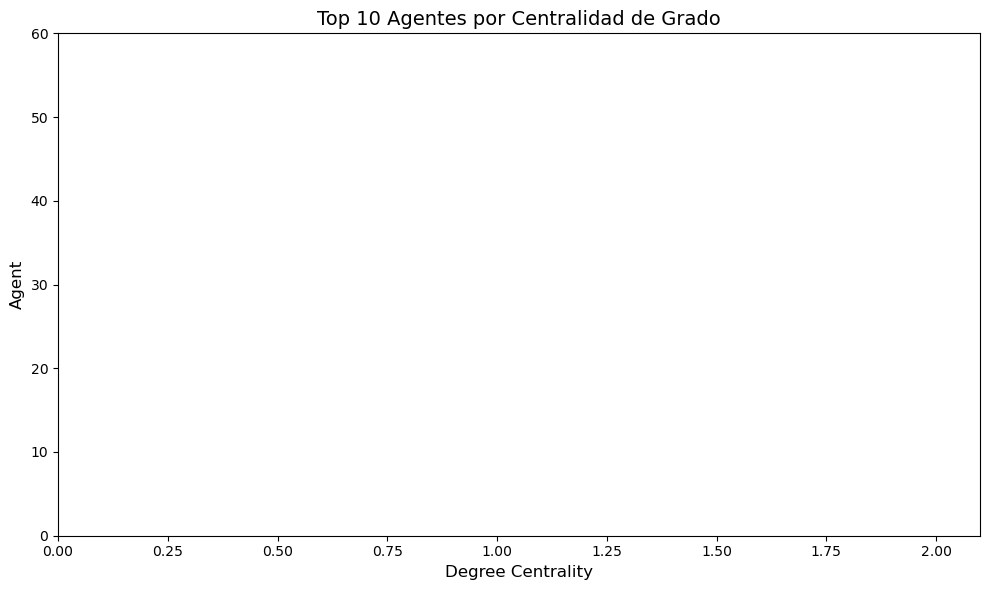

In [47]:
import matplotlib.pyplot as plt

# Ordenar los datos por una métrica específica (ejemplo: Degree Centrality)
centrality_df_sorted = centrality_df.sort_values(by='Degree Centrality', ascending = False).head(10)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(centrality_df_sorted['Agent'], centrality_df_sorted['Degree Centrality'], color = 'pink')

# Ajustar el rango del eje 
plt.ylim(0, 60)  

# Etiquetas y título
plt.xlabel('Degree Centrality', fontsize=12)
plt.ylabel('Agent', fontsize=12)
plt.title('Top 10 Agentes por Centralidad de Grado', fontsize = 14)

# Ajustar las etiquetas del eje Y para que no se corten
plt.yticks(fontsize = 10)  # Cambia el tamaño de fuente de las etiquetas en el eje Y

# Asegurarse de que el diseño no corte las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

